## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [338]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

#### Answer the following question by providing Python code:

In [339]:
# Bring the data.
housing_data = fetch_california_housing()

In [340]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

### 1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [341]:
df = pd.DataFrame(housing_data.data,
                   columns=housing_data.feature_names)

In [342]:
housing_data.data.shape

(20640, 8)

In [343]:
#adding the target to the df :
df['MedHouseValue'] = housing_data.target
df['MedHouseValue'] = df['MedHouseValue']     #actual price value

In [358]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [344]:
df.shape

(20640, 9)

In [345]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [346]:
#removing outliers

from scipy import stats

z = np.abs(stats.zscore(df))
threshold = 3
df = df[(z < 3).all(axis=1)];

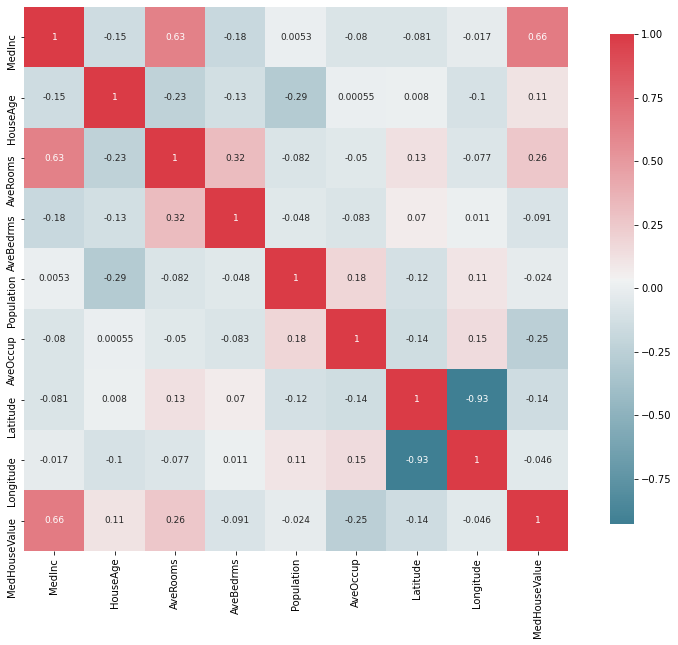

In [347]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots(figsize=(15,10))
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax= ax, annot = True, annot_kws = { 'fontsize' : 9 })

plot_correlation_map(df)

In [348]:
# "MedIncome" has the strongest correlation with the target feature "Med House Value". We will use it for the linear regression.μ

### 2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

In [349]:
X = df.MedInc
Y = df.MedHouseValue

In [350]:
b1 = tf.Variable(1.0)                # A constant initial value.
b0 = tf.Variable(1.0)                # A constant initial value.

define the input `x` and  labels `y` placeholders, use tf.placeholder. No need to specify the shape

In [351]:
X_ph = tf.placeholder(tf.float32)
y_ph= tf.placeholder(tf.float32)

####  Define the model:

define your model using `a` `b` and `x` , remember : $y\_model = a*x+b$ 

In [352]:
y_model= X_ph*b1 + b0

## Define the loss function and the optimization method:





In [353]:
loss = tf.reduce_mean(tf.square(y_ph - y_model))          # L2 loss.

In [354]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# optimizer = tf.train.MomentumOptimizer(learning_rate = 0.001, momentum=0.9)   # Momentum optimizer.

In [355]:
n_epochs = 1000                              
train = optimizer.minimize(loss)                     
init = tf.global_variables_initializer()                                          

with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)
        
        # Training.
        my_feed = {X_ph: X, y_ph: Y} 
        
        for i in range(n_epochs):
                 
            sess.run(train, feed_dict = my_feed)
        b0_model, b1_model = sess.run([b0, b1])                   # Get the final values of the Variables.
        # Testing.
        
        mse_value = sess.run(loss, feed_dict = my_feed)            # Calculate the in-sample MSE.

## Display the result : 
the following are the expected results

In [356]:
print("Parameters b0 = {:5.3f} , b1 = {:5.3f}".format(b0_model, b1_model))

Parameters b0 = 0.357 , b1 = 0.448


In [357]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

MSE  = 0.695
RMSE = 0.834
